In [212]:
#import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Display descriptive statistics for numeric columns

df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
# Display summary info about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Convert the column to datetime

df["date_added"] = pd.to_datetime(df["date_added"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [7]:
type_values = df["type"].value_counts()
type_values

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [8]:
# Check for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [10]:
df["country"].value_counts().head(10)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

In [11]:
df['listed_in'].unique()

array(['Documentaries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries',
       'Children & Family Movies, Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Children & Family Movies, Comedies, Music & Musicals',
       'Dramas, International Movies',
       'Children & Family Movies, Music & Musicals',
       'Dramas, International Movies, Music & Musicals', 'Movies',
       'Comedies', 'Docuseries, Reality TV',
       'British TV Shows, Crime TV Shows, Docuseries',
       'Children & Family Movies', "Kids' TV",
       'Documentaries, International Movies',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Comedies, International Movies, Romantic Movies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'TV Comedies', 'I

In [12]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                               362
Documentaries                                              359
Stand-Up Comedy                                            334
Comedies, Dramas, International Movies                     274
Dramas, Independent Movies, International Movies           252
                                                          ... 
TV Action & Adventure, TV Comedies                           1
Romantic TV Shows, Spanish-Language TV Shows, TV Dramas      1
Classic & Cult TV, Kids' TV, Spanish-Language TV Shows       1
Anime Series, Crime TV Shows, TV Thrillers                   1
British TV Shows, Docuseries, Reality TV                     1
Name: count, Length: 513, dtype: int64

In [13]:
df.shape

(8790, 10)

In [14]:
# Split 'Country' into multiple columns
df_country_split = df['country'].str.split(',', expand=True)

# Split 'Listed_in' into multiple columns
df_listed_in_split = df['listed_in'].str.split(',', expand=True)

# Combine back into the original DataFrame
df = pd.concat([df, df_country_split, df_listed_in_split], axis=1)

# Display the result
print(df)


     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2

In [15]:
# Split 'Country' into separate rows
df_country_exploded = df['country'].str.split(',').explode().reset_index(drop=True)

# Split 'Listed_in' into separate rows
df_listed_in_exploded = df['listed_in'].str.split(',').explode().reset_index(drop=True)

# Combine back into a new DataFrame
df_exploded = pd.DataFrame({'country': df_country_exploded,'listed_in': df_listed_in_exploded})

# Display the result
print(df_exploded)


             country                listed_in
0      United States            Documentaries
1             France           Crime TV Shows
2      United States   International TV Shows
3             Brazil    TV Action & Adventure
4      United States                TV Dramas
...              ...                      ...
19289            NaN   International TV Shows
19290            NaN        Romantic TV Shows
19291            NaN                TV Dramas
19292            NaN                 Kids' TV
19293            NaN                 Kids' TV

[19294 rows x 2 columns]


In [16]:
df_exploded.shape

(19294, 2)

In [17]:
df_exploded.value_counts().head(10)

country         listed_in               
United States    International Movies       636
                Dramas                      342
                Comedies                    278
                 Dramas                     229
India            International Movies       196
United States   Action & Adventure          169
                 Romantic Movies            151
                 Independent Movies         146
United Kingdom   International Movies       143
United States   Children & Family Movies    128
Name: count, dtype: int64

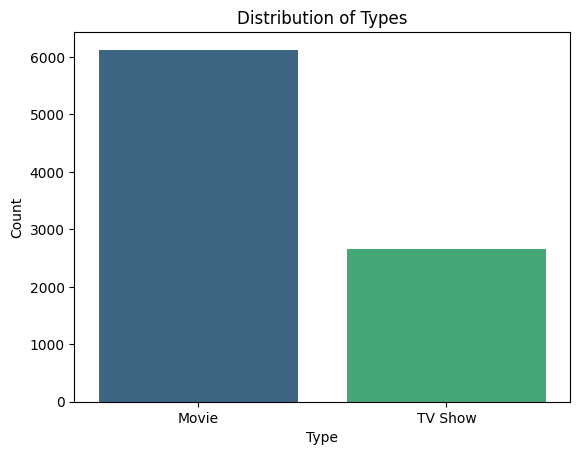

In [18]:
# Create the count plots')
sns.barplot(x=type_values.index, y=type_values.values, palette='viridis')
# Set the title and labels
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Show the plot
plt.show()



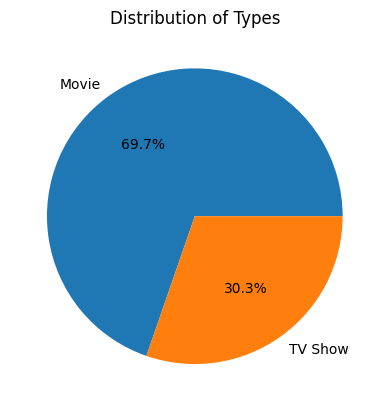

In [19]:
# Create a pie chart
plt.pie(type_values, labels=type_values.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Types')

# Show the plot
plt.show()

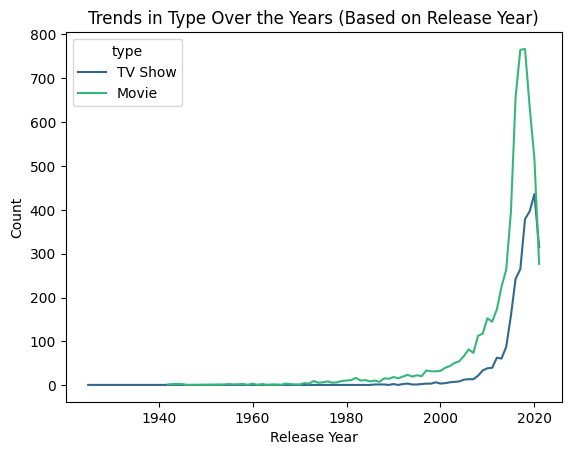

In [20]:
# Group by 'Release_year' and 'type', and count occurrences
df_grouped = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Create a bar plot to visualize the trend
sns.lineplot(x='release_year', y='count', hue='type', data=df_grouped, palette='viridis')

# Set the title and labels
plt.title('Trends in Type Over the Years (Based on Release Year)')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Show the plot
plt.show()


In [21]:
df["release_year"].value_counts()

release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1961       1
1959       1
1925       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

In [22]:
top10_listen_in = df['listed_in'].value_counts().head(10)

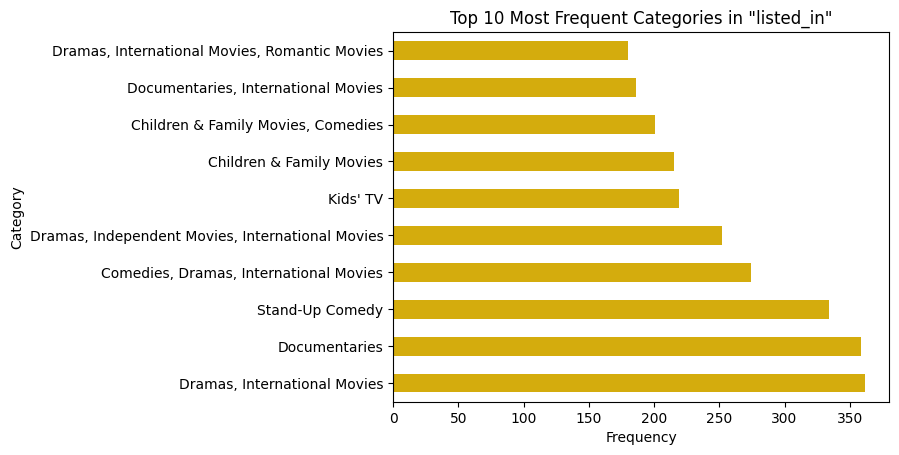

In [23]:
# Plot the result
top10_listen_in.plot(kind='barh', color='#d4ac0d')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 10 Most Frequent Categories in "listed_in"')

# Show the plot
plt.show()


In [37]:
df['director'].value_counts()

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
                          ... 
Mark Risley                  1
Kirati Nakintanon            1
Christian De Vita            1
Abu Bakr Shawky              1
N. Chandra                   1
Name: count, Length: 4528, dtype: int64

In [43]:
top10_directors = df['director'].value_counts().head(10)

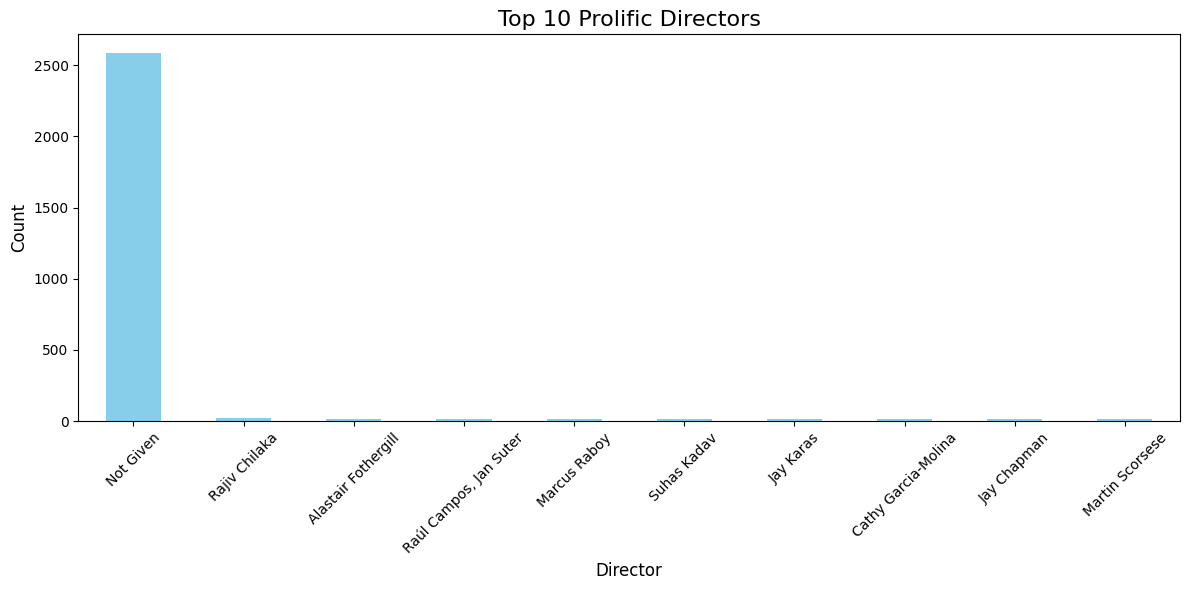

In [45]:
# Plot the bar chart
top10_directors.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Top 10 Prolific Directors', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [32]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [48]:
# Count unique ratings and their occurrences
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

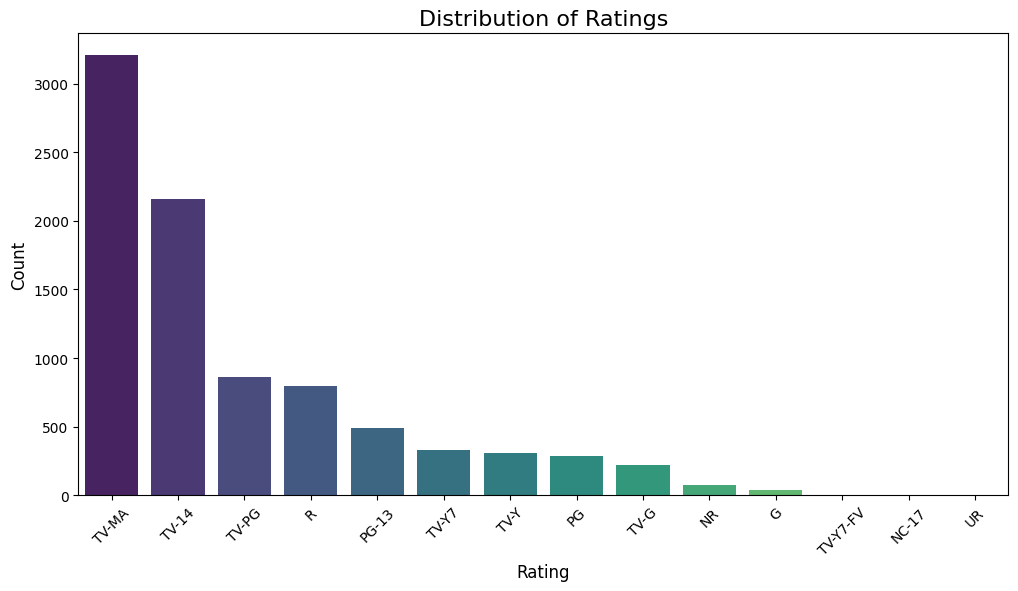

In [58]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=rating.index, y=rating.values, palette='viridis') 
plt.title('Distribution of Ratings', fontsize=16) 
plt.xlabel('Rating', fontsize=12) 
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

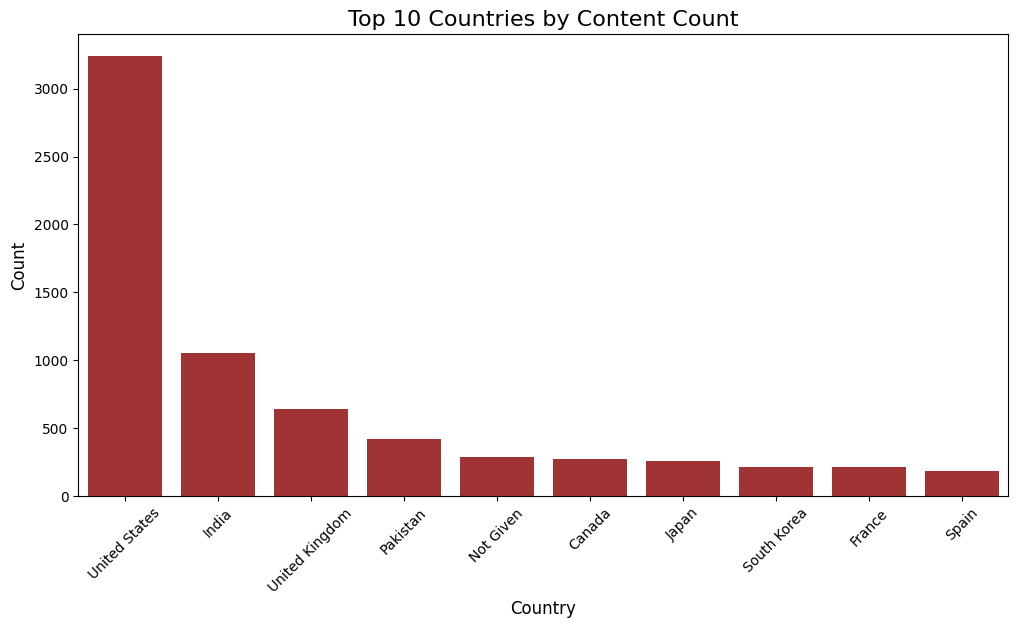

In [59]:
# Get the top 10 countries
top10_countries = df['country'].value_counts().head(10)

# Convert to DataFrame for seaborn compatibility
top10_countries_df = top10_countries.reset_index()
top10_countries_df.columns = ['Country', 'Count']  # Rename columns for clarity

# Plot using seabor
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', data=top10_countries_df, color='#B22222')
plt.title('Top 10 Countries by Content Count', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

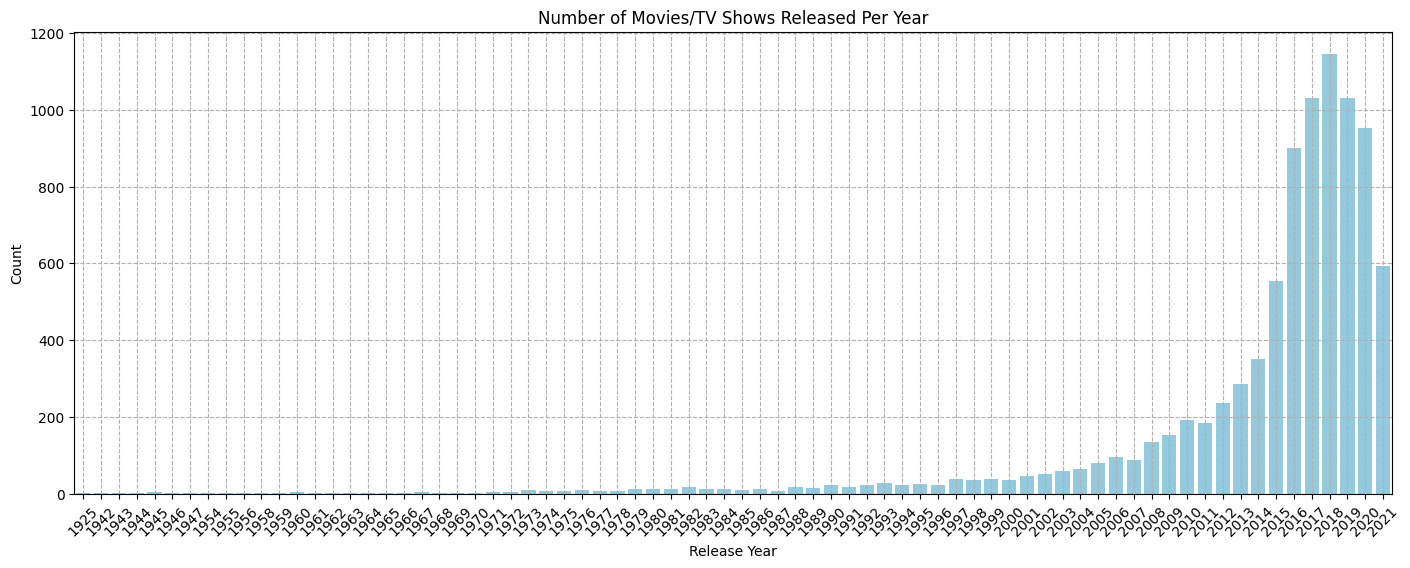

In [85]:
# Count the number of movies/TV shows released each year
release_year_counts = df['release_year'].value_counts()# Sort by year

# Plot the data
plt.figure(figsize=(17, 6))  # Set figure size
sns.barplot(x=release_year_counts.index, y=release_year_counts.values, color='skyblue')
plt.title('Number of Movies/TV Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(linestyle = '--')
plt.show()


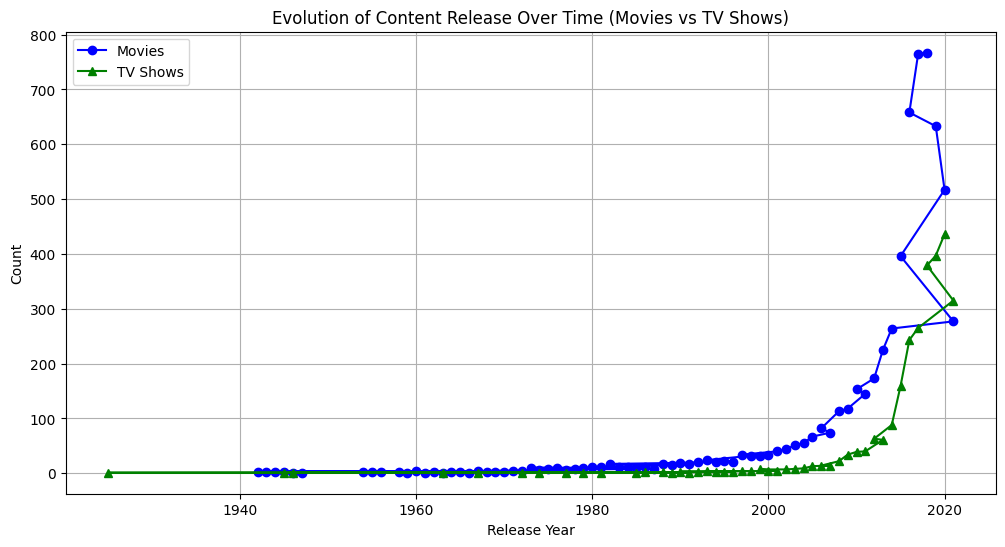

In [107]:
df_movies = df[df['type']=='Movie']
df_tv_shows = df[df['type']=='TV Show']

movies_per_year = df_movies["release_year"].value_counts()
tv_shows_per_year = df_tv_shows["release_year"].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot for Movies and TV Shows
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', label='Movies', color='blue')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, marker='^', label='TV Shows', color='green')

# Add Titles and Labels
plt.title('Evolution of Content Release Over Time (Movies vs TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True) 

plt.show()


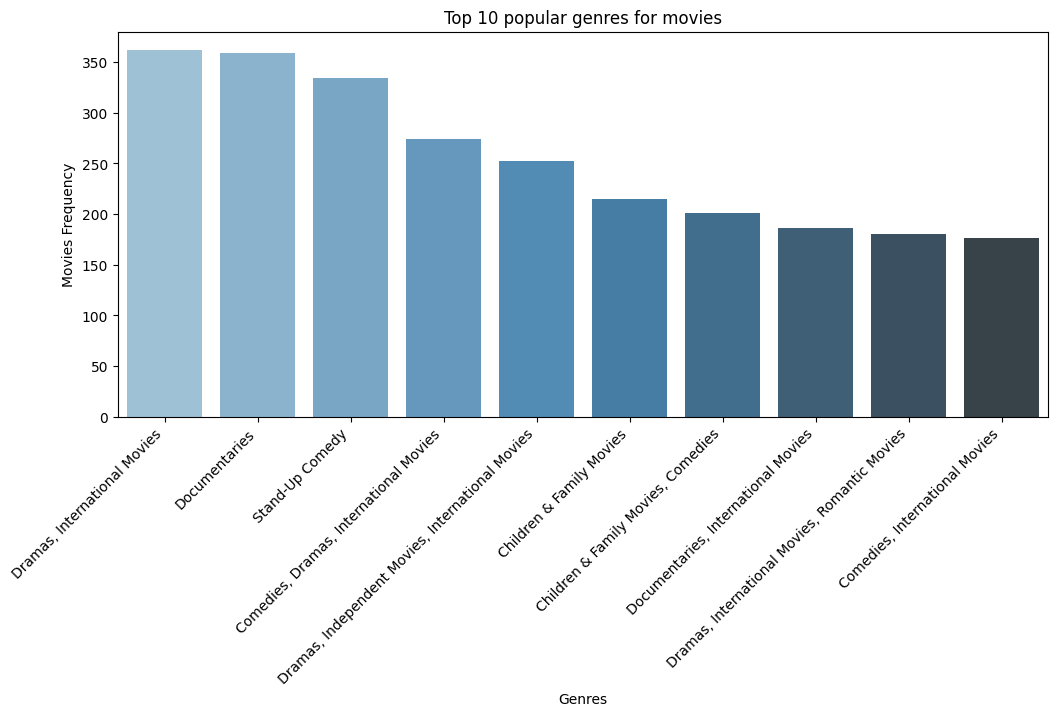

In [144]:
# Get the top 10 most popular movie genres
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 5))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')


# Add labels and title
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 popular genres for movies")
plt.show()

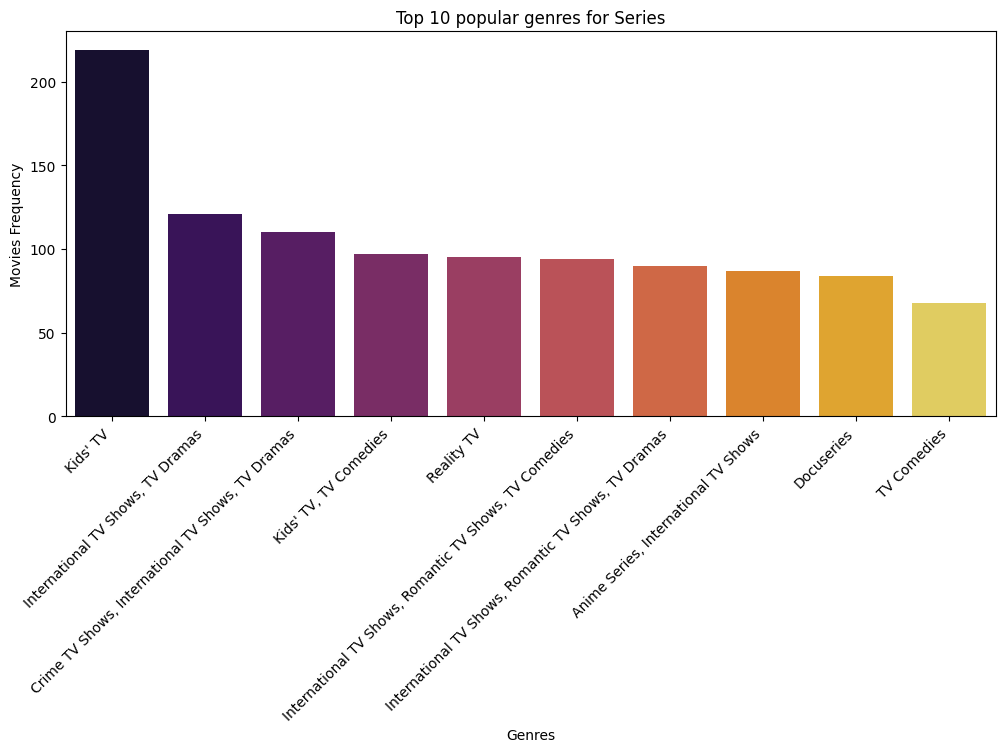

In [146]:
# Get the top 10 most popular series genres

popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 5))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='inferno')
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 popular genres for Series")
plt.show()

In [165]:
df['date_added'].value_counts()

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2015-12-02      1
2016-09-22      1
2016-09-17      1
2017-05-04      1
2021-09-20      1
Name: count, Length: 1713, dtype: int64

In [166]:
df_month = df['date_added'].dt.month

0        9
1        9
2        9
3        9
4        9
        ..
8785     1
8786     9
8787    12
8788     6
8789     6
Name: date_added, Length: 8790, dtype: int32

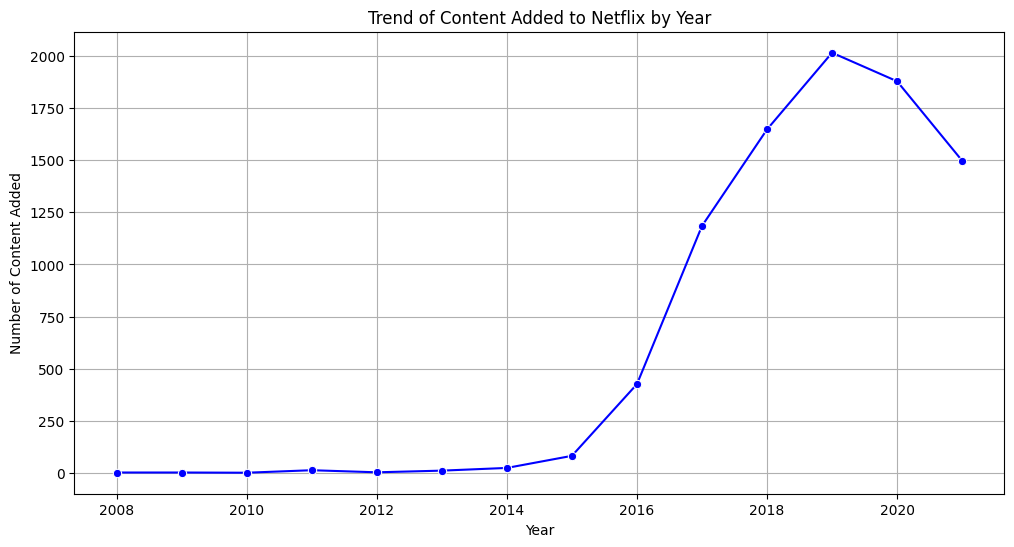

In [174]:
# Extract year and month from 'Date_added'
df['Year_added'] = df['date_added'].dt.year
df['Month_added'] = df['date_added'].dt.month

# Group by year and count the number of additions
content_per_year = df['Year_added'].value_counts().sort_index()

# Plot the trend of content additions by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o', color='blue')
plt.title('Trend of Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.grid(True)
plt.show()


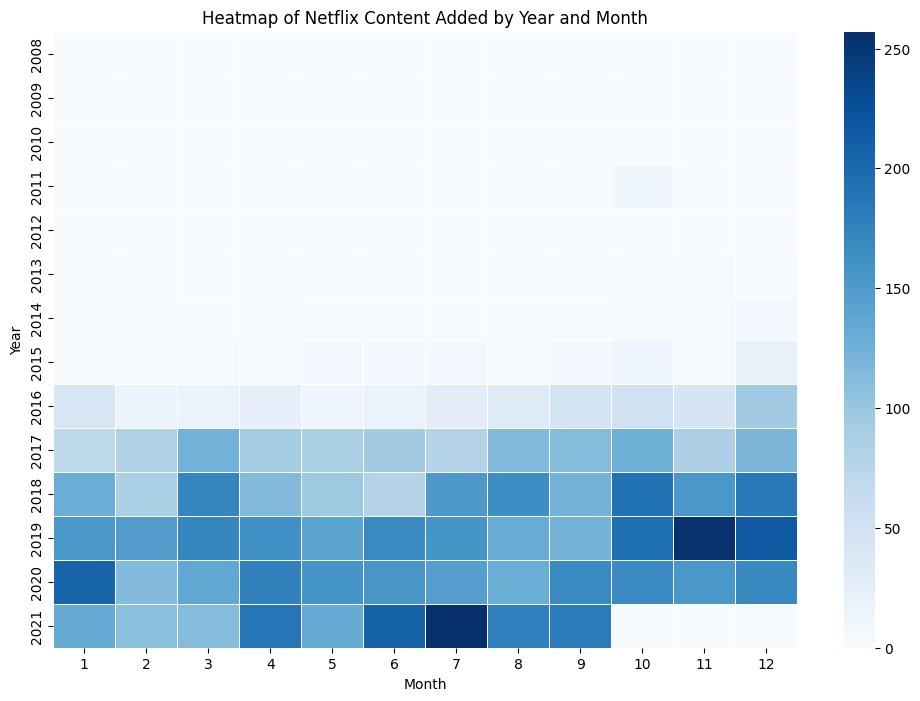

In [175]:
# Analyze trends by year and month
content_per_month_year = df.groupby(['Year_added', 'Month_added']).size().unstack(fill_value=0)

# Heatmap for monthly trends
plt.figure(figsize=(12, 8))
sns.heatmap(content_per_month_year, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Netflix Content Added by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


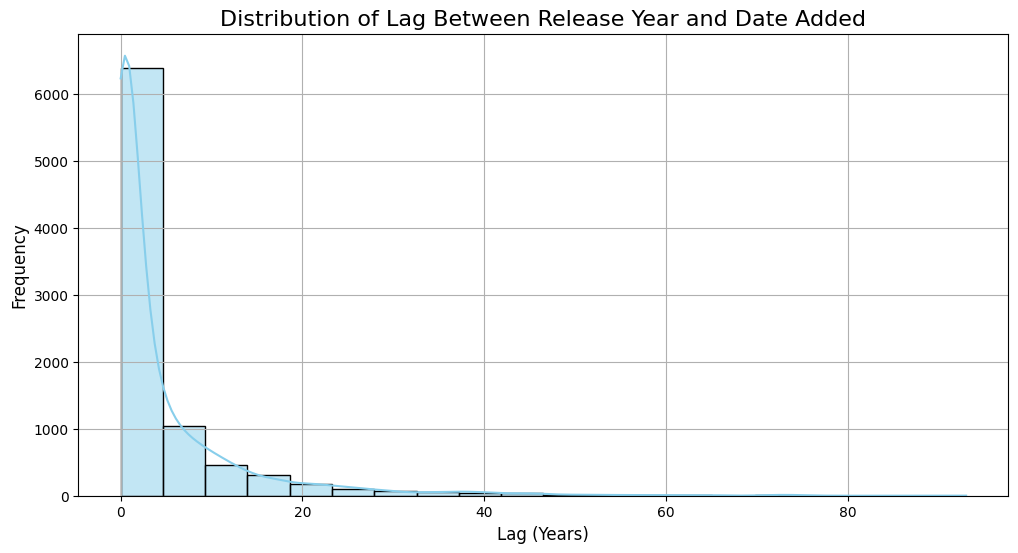

In [184]:
# Extract year from 'Date_added' and calculate lag
df['Year_added'] = df['date_added'].dt.year
df['Lag'] = df['Year_added'] - df['release_year']

# Plot the distribution of the lag
plt.figure(figsize=(12, 6))
sns.histplot(df['Lag'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Lag Between Release Year and Date Added', fontsize=16)
plt.xlabel('Lag (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


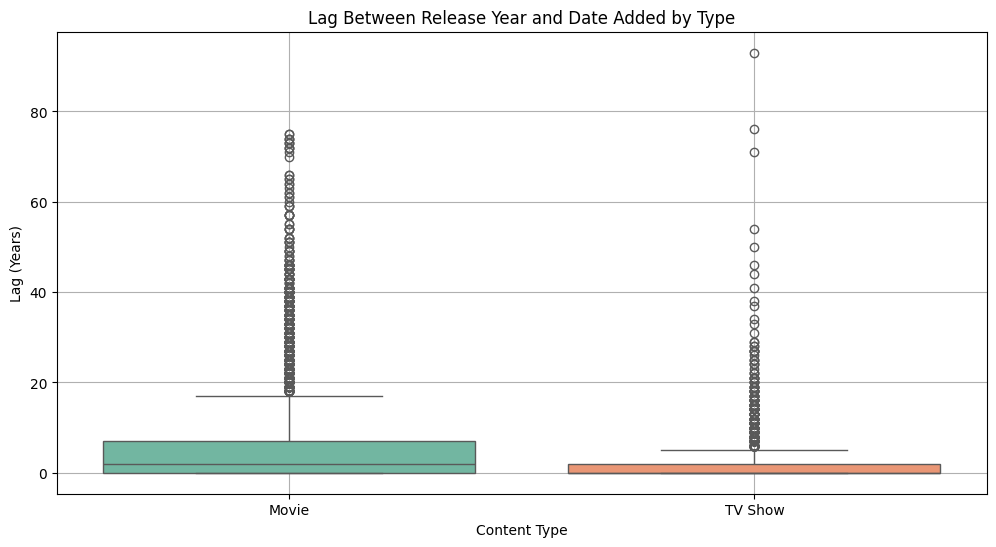

In [186]:
 # Boxplot for lag by type (Movies vs TV Shows)
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='Lag', data=df, palette='Set2')
plt.title('Lag Between Release Year and Date Added by Type')
plt.xlabel('Content Type')
plt.ylabel('Lag (Years)')
plt.grid(True)
plt.show()


In [188]:
df['duration'].value_counts()

duration
1 Season      1787
2 Seasons      417
3 Seasons      198
90 min         152
94 min         146
              ... 
191 min          1
17 Seasons       1
10 min           1
312 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

Average Movie Duration: 99.59 minutes
Average TV Show Duration: 1.75 seasons


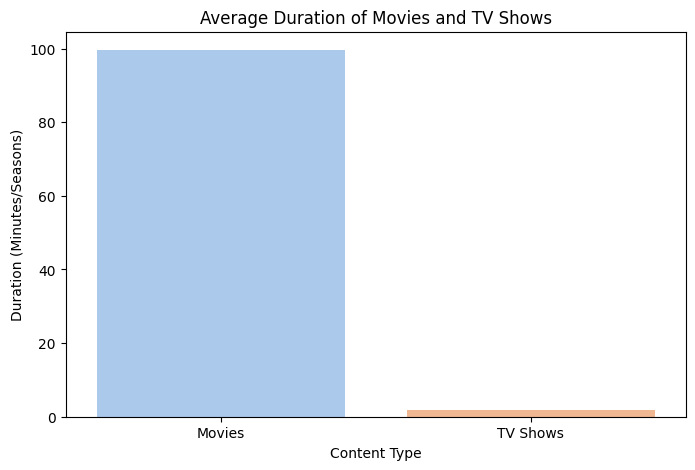

In [196]:
df['duration'] = df['duration'].fillna('0')  # Fill missing values for safety

# Separate data for Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Extract numeric duration for Movies
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

# Extract numeric duration for TV Shows
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Calculate average duration
average_movie_duration = movies['duration_minutes'].mean()
average_tv_show_seasons = tv_shows['duration_seasons'].mean()

# Print results
print(f"Average Movie Duration: {average_movie_duration:.2f} minutes")
print(f"Average TV Show Duration: {average_tv_show_seasons:.2f} seasons")

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=['Movies', 'TV Shows'], y=[average_movie_duration, average_tv_show_seasons],palette='pastel')
plt.title('Average Duration of Movies and TV Shows')
plt.ylabel('Duration (Minutes/Seasons)')
plt.xlabel('Content Type')
plt.show()


Number of Short Films (<40 min): 169
Number of Long Movies (>180 min): 47
Number of Long TV Shows (>10 seasons): 8


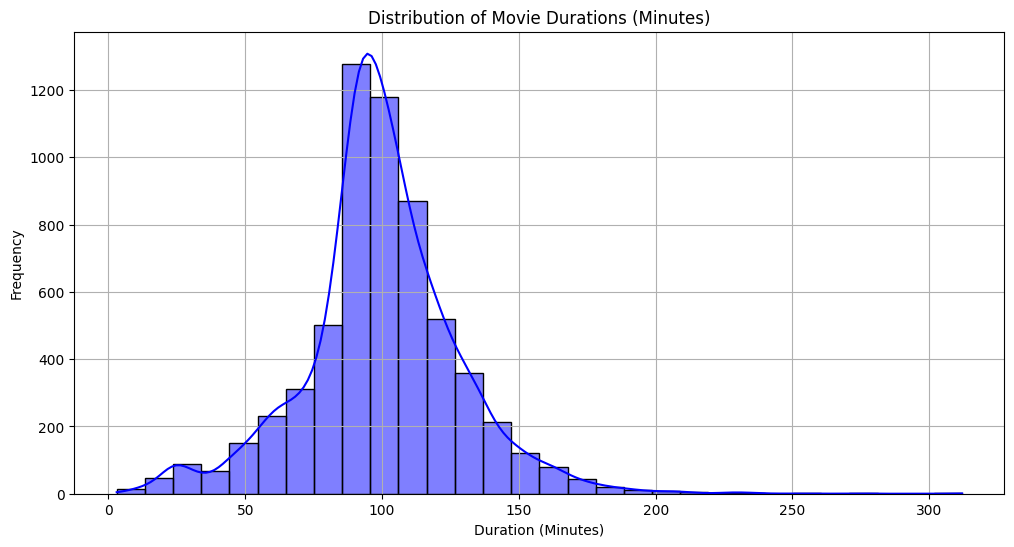

In [200]:
# Identify short and long content
short_films = movies[movies['duration_minutes'] < 40]
long_movies = movies[movies['duration_minutes'] > 180]
long_tv_shows = tv_shows[tv_shows['duration_seasons'] > 10]

# Print insights
print(f"Number of Short Films (<40 min): {len(short_films)}")
print(f"Number of Long Movies (>180 min): {len(long_movies)}")


# Plot distributions for movies
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration_minutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Number of Long TV Shows (>10 seasons): 8


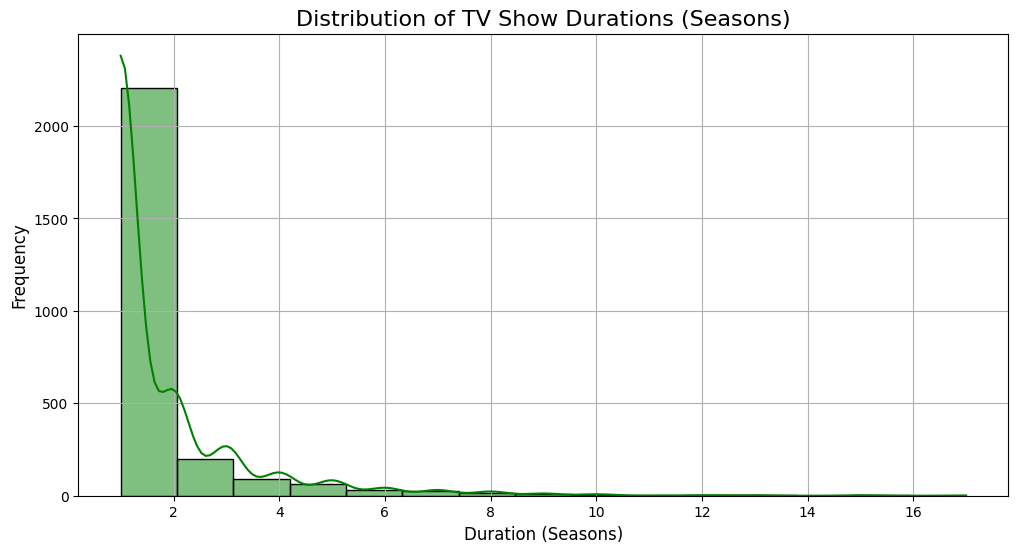

In [203]:
print(f"Number of Long TV Shows (>10 seasons): {len(long_tv_shows)}")
# Plot distributions for TV shows
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['duration_seasons'], bins=15, kde=True, color='green')
plt.title('Distribution of TV Show Durations (Seasons)', fontsize=16)
plt.xlabel('Duration (Seasons)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

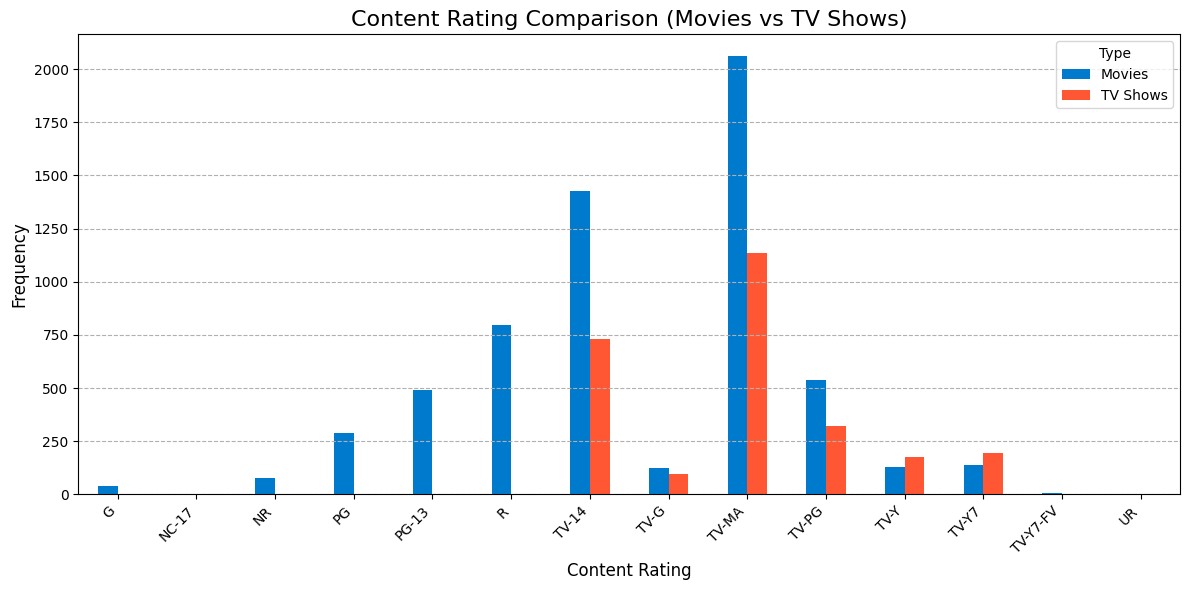

In [210]:
# Separate Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count ratings for Movies
movie_ratings = movies['rating'].value_counts()

# Count ratings for TV Shows
tv_show_ratings = tv_shows['rating'].value_counts()

# Combine into one DataFrame for comparison
ratings_comparison = pd.DataFrame({'Movies': movie_ratings,'TV Shows': tv_show_ratings})
# Plot side-by-side bar chart
ratings_comparison.plot(kind='bar', figsize=(12, 6), color=['#007ACC', '#FF5733'])
plt.title('Content Rating Comparison (Movies vs TV Shows)', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()




In [211]:
# TV-MA (Mature Audiences):
# TV-14:Typically for audiences 14 and older.
# TV-PG (Parental Guidance):
# TV-Y7:Designed for children aged 7 and older.
# TV-Y (Young Children):
# TV-G (General Audience):
# PG-13 (Parents Strongly Cautioned):
# PG (Parental Guidance):
# G (General Audience):
# R (Restricted):
# NC-17:No one under 17 is admitted.
# NR (Not Rated):
# UR (Unrated):
# TV-Y7-FV (Fantasy Violence):

SyntaxError: invalid syntax. Perhaps you forgot a comma? (878076495.py, line 1)